# SALES PREDICTION DATASET

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.



# Task
- Importing Libraries
- Preprocessing Part
    - Missing Value Treatment
    - Outlier Checking
- Exploratory Data Analysis
- Feature Scaling
- Algorithm
    - Linear Regression
    - OLS
    - Checking Errors

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading of Data

In [2]:
df =pd.read_csv("advertisment.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

### checking unique value in the dataset

In [5]:
for i in df:
    print("***********", i, "*************")
    print(df[i].unique())

*********** TV *************
[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17

### information about column, datatype, how many values in particular rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


 all float and no missing

# checking outlier

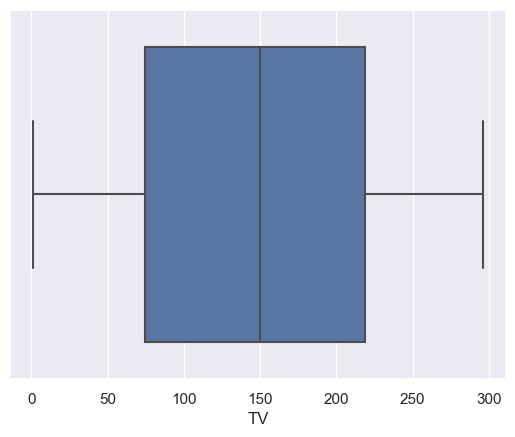

None


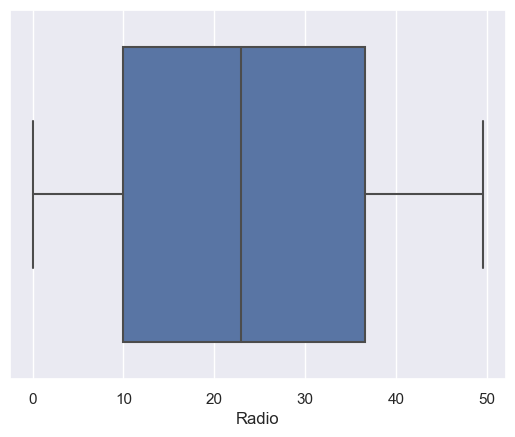

None


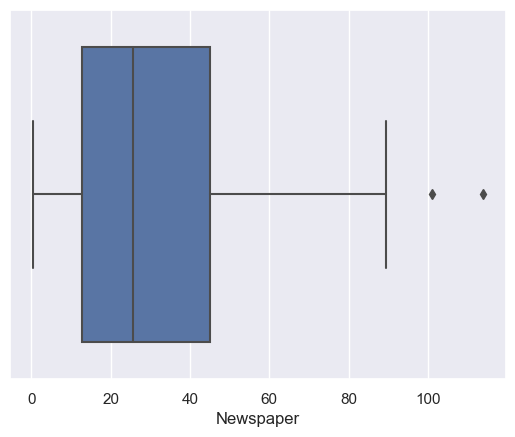

None


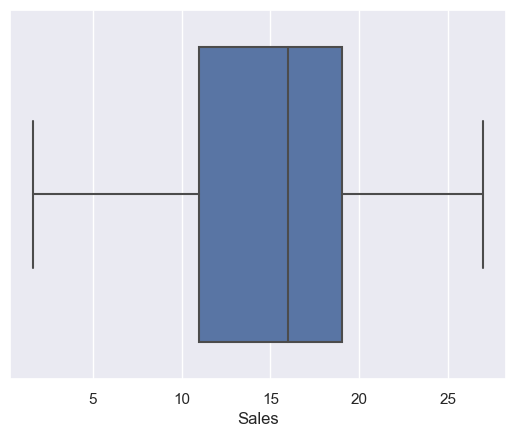

None


In [7]:
def outs(name):
    sns.boxplot(df[name])
    plt.show()
    
for i in df:
    print(outs(i))

### some outlier found in Newspaper columns

# Treating outlier

In [8]:
q3 = df["Newspaper"].quantile(0.75)
q1 = df["Newspaper"].quantile(0.25)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [9]:
df["Newspaper"] = np.where(df["Newspaper"] > upper, upper, np.where(df["Newspaper"]<lower, lower, df["Newspaper"]))

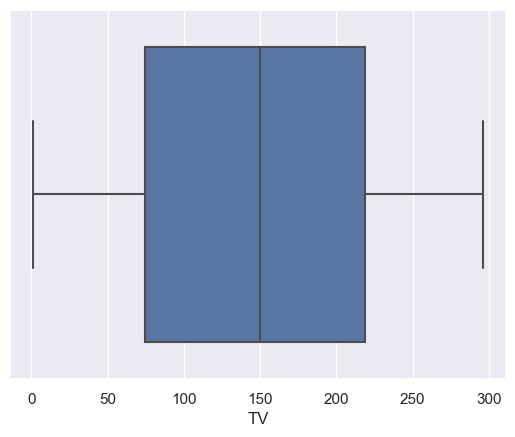

None


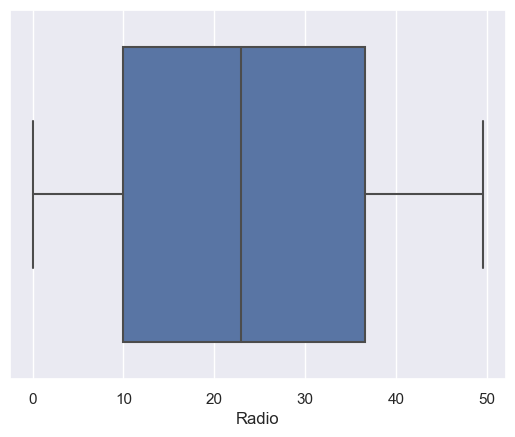

None


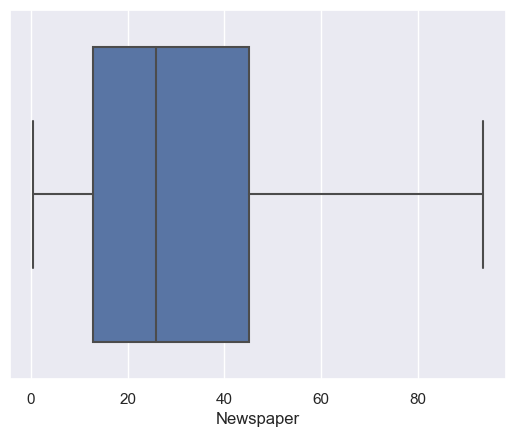

None


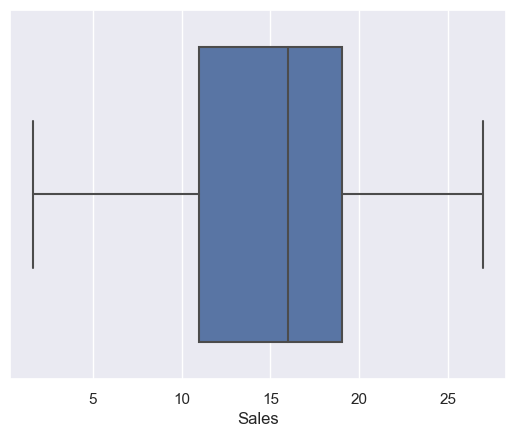

None


In [10]:
def outs(name):
    sns.boxplot(df[name])
    plt.show()
    
for i in df:
    print(outs(i))

# EDA

AxesSubplot(0.125,0.11;0.775x0.77)


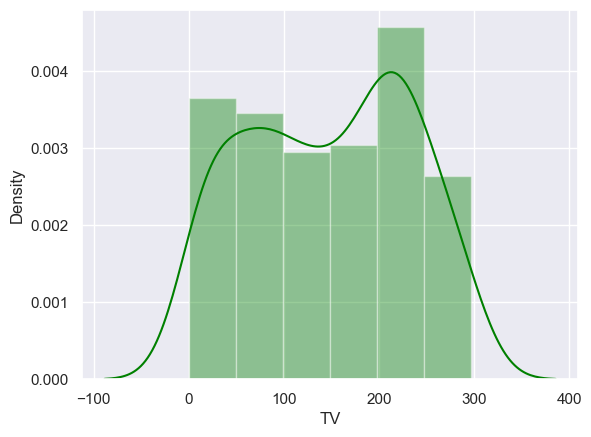

AxesSubplot(0.125,0.11;0.775x0.77)


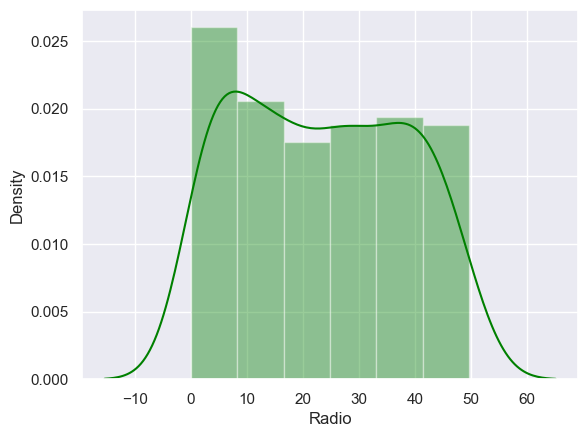

AxesSubplot(0.125,0.11;0.775x0.77)


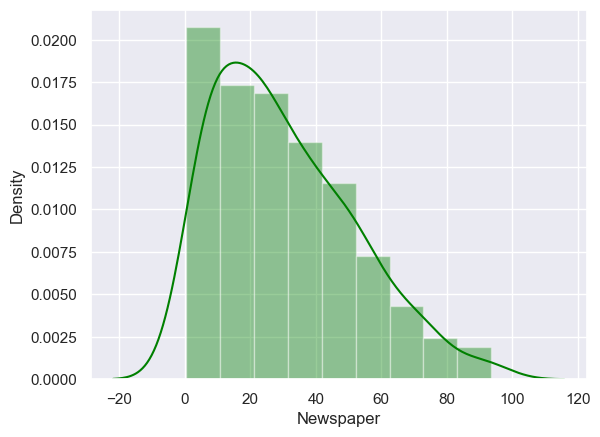

AxesSubplot(0.125,0.11;0.775x0.77)


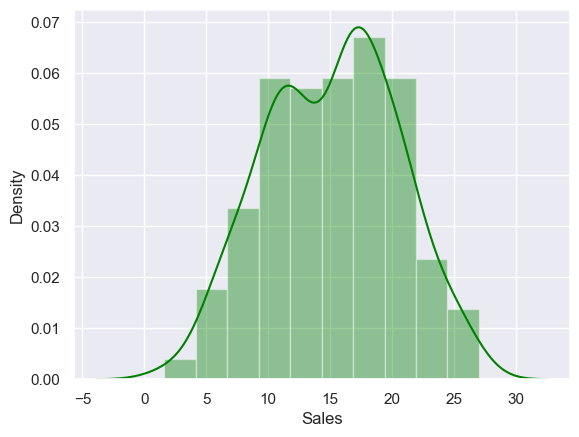

In [39]:
for i in df:
    print(sns.distplot(df[i], color= "green"))
    plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


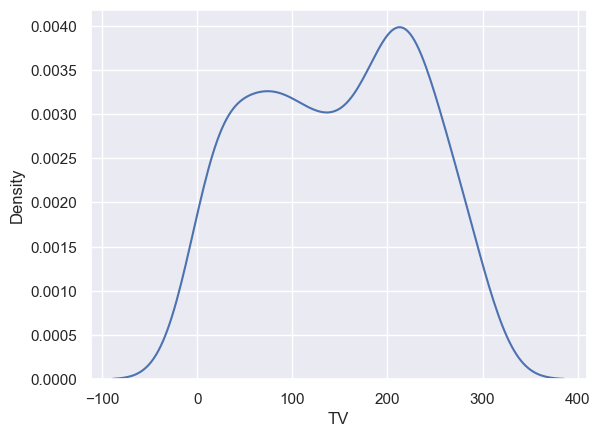

AxesSubplot(0.125,0.11;0.775x0.77)


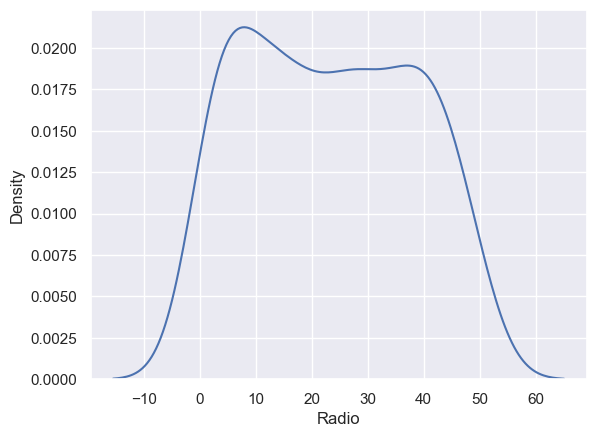

AxesSubplot(0.125,0.11;0.775x0.77)


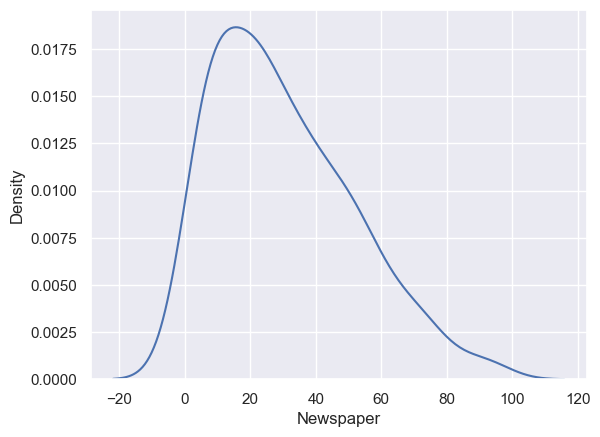

AxesSubplot(0.125,0.11;0.775x0.77)


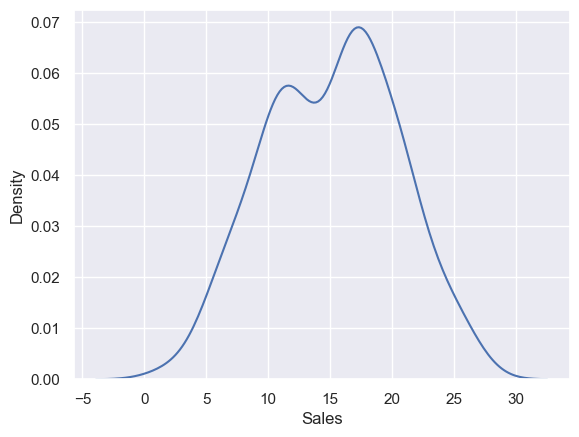

In [12]:
for i in df:
    print(sns.kdeplot(df[i]))
    plt.show()

 Sales is almost following normality 

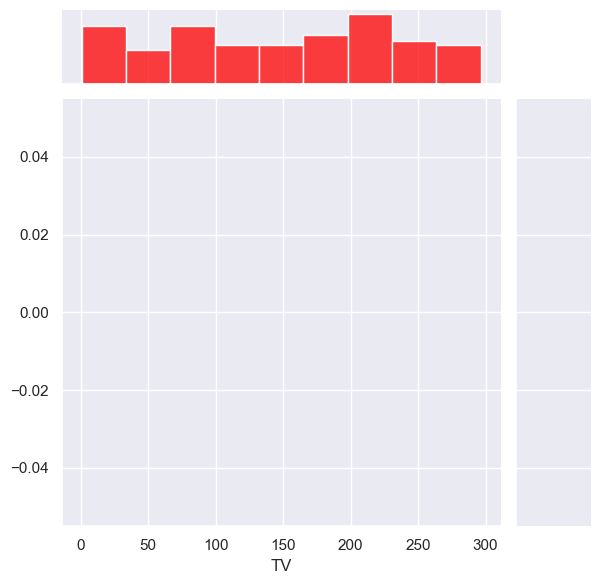

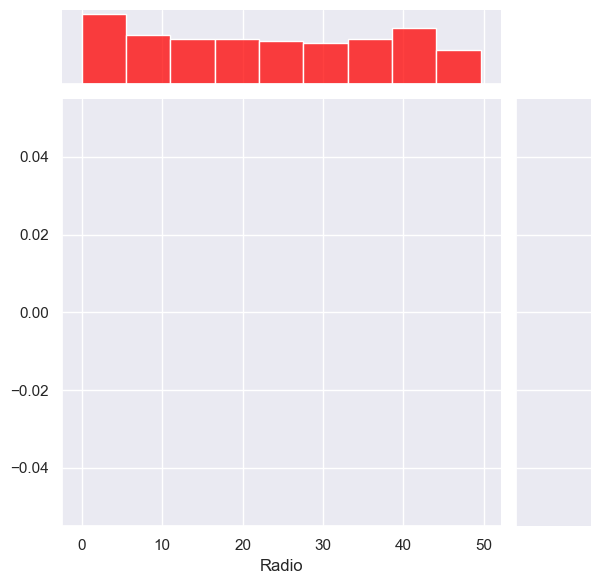

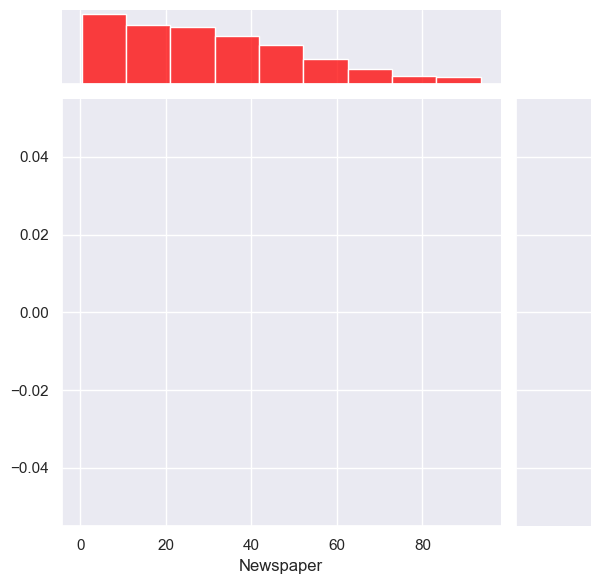

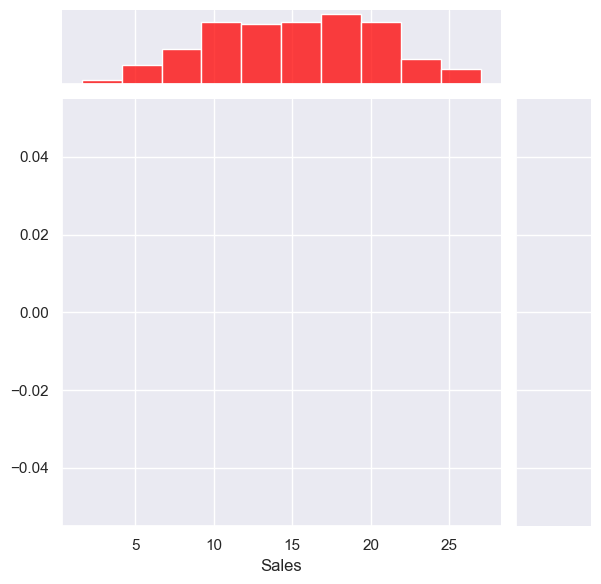

In [33]:
for i in df:
    print(sns.jointplot(df[i], color="Red"))
    plt.show()

<AxesSubplot:>

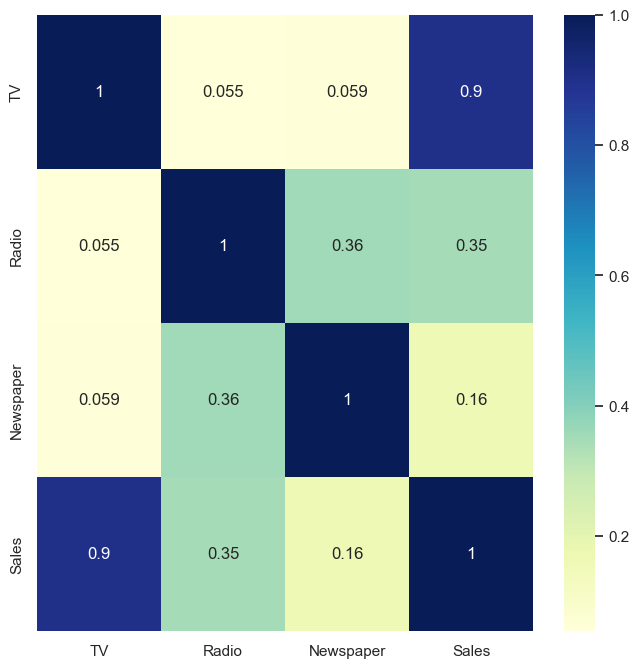

In [14]:
plt.figure(figsize= (8,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

* Tv will be good predictor of sales 
* If a feature is highly correlated with the target variable, it suggests that there is a strong relationship between the two, and the feature may be a good predictor.

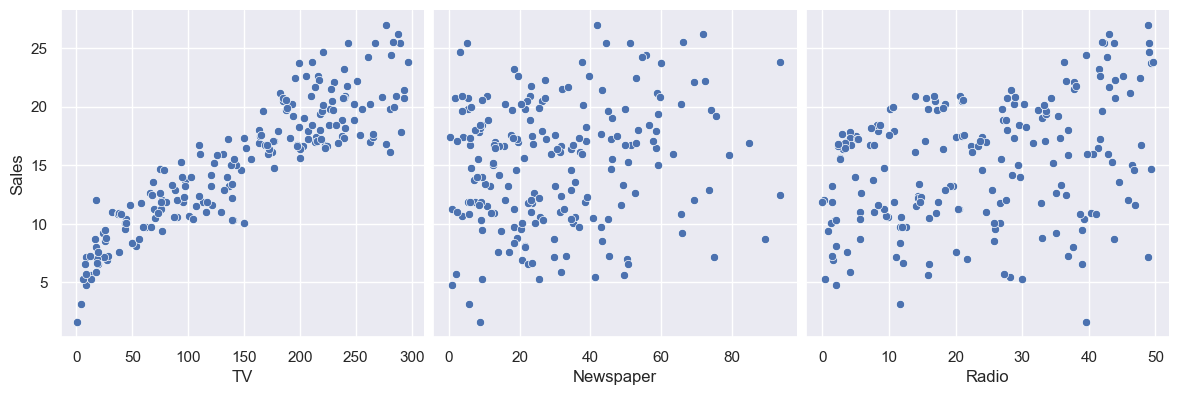

In [15]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# Performing Simple Linear Regression
Equation of linear regression

y=c+m1x1+m2x2+...+mnxn
 
y
  is the response
c
  is the intercept
m1
  is the coefficient for the first feature
mn
  is the coefficient for the nth feature
In our case:

y=c+m1×TV
 
The  m
  values are called the model coefficients or model parameters.

# Seprating independent and dependent fetures

In [16]:
x = df[["TV"]]
y = df[["Sales"]]

# Linear Model

spliting the data

In [17]:
x.shape

(200, 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 852)

# Appling OLS technique
for checking R-squ and Adj r-squ and so more

In [19]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg = smf.OLS(endog= y_train, exog= x_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              2257.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    7.50e-96
Time:                        15:04:46   Log-Likelihood:                         -452.35
No. Observations:                 160   AIC:                                      906.7
Df Residuals:                     159   BIC:                                      909.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0911      0.002     47.504      0.000       0.087       0.095
==============================================================================
Omnibus:                        7.679   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.043
Skew:                          -0.544   Prob(JB):                       0.0179
Kurtosis:                       2.846   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### acc to Durbin Wetson test there is  no Autocorrelation

In [20]:
reg.params

TV    0.091112
dtype: float64

# Simple Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# prediction

In [22]:
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# r2_score

In [23]:
from sklearn.metrics import r2_score

In [24]:
y_pred_acc = r2_score(y_test, y_pred)
y_pred_trn_acc = r2_score(y_train, y_pred_train)

In [25]:
print("test:", y_pred_acc)
print("train :", y_pred_trn_acc)

test: 0.7123795395998305
train : 0.8275708291877851


### accuracy is good and no overfitting and underfitting problem

# checking MAE, RMSE, MAE, MAPE

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


#Returns the mean squared error; we'll take a square root
print("root mean square error on test : ",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean square error on test : ",  mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error on test : ",  mean_absolute_percentage_error(y_test, y_pred)/100)
print("mean_absolute_error on test : ",  mean_absolute_error(y_test, y_pred))

root mean square error on test :  2.41615325097244
mean square error on test :  5.837796532184692
mean_absolute_percentage_error on test :  0.0012467864074177414
mean_absolute_error on test :  1.9350379702485772


### Error is no so high

# linearity of data

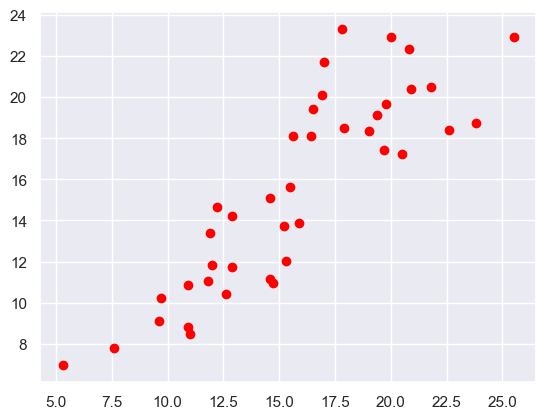

In [32]:
plt.scatter(y_test, y_pred, c= "red")

The residuals are following the normally distributed with a mean 0. All good!

# normality of residual

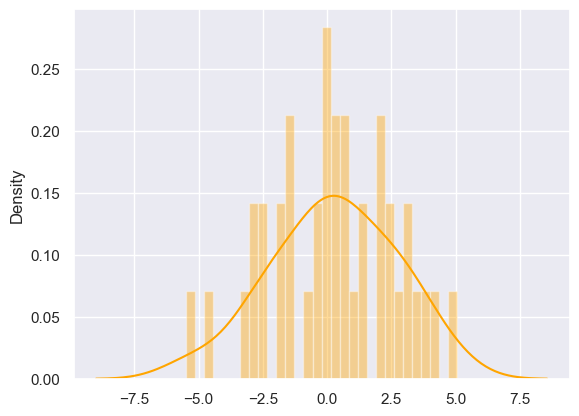

In [30]:
sns.distplot(y_test- y_pred, bins=30, color= "orange")
plt.show()

## Summary of Model
* no homogenity
* normality in residual
* no autocorrelation
* no multicollinarity
* no overfitting and underfitting in the model -->